## <i><font color='red'>Imports</font></i>

In [159]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## <i><font color='red'>Constants</font></i>

## <i><font color='red'>Configuration</font></i>

In [ ]:
sns.set(rc={'figure.figsize':(16,8.27)})

##  <i><font color='red'>Functions</font></i>

In [140]:
def remove_punctuation_stop_words(text):
    """return list of words that doest have punctuations and stop words"""
    filtered = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
            
    return filtered

##  <i><font color='orange'>Word Cloud</font></i>

In [258]:
df = pd.read_csv(r".\data\data_clean_enrich.csv")

In [148]:
df = df[['desc','rate']]
df['rate'] = df.rate.fillna(0)
df['desc'] = df['desc'].fillna("")

In [150]:
words = " ".join(df.desc)
filter_words = remove_punctuation_stop_words(words)
not_wanted = []
text = " ".join([item for item in filter_words if item not in not_wanted])

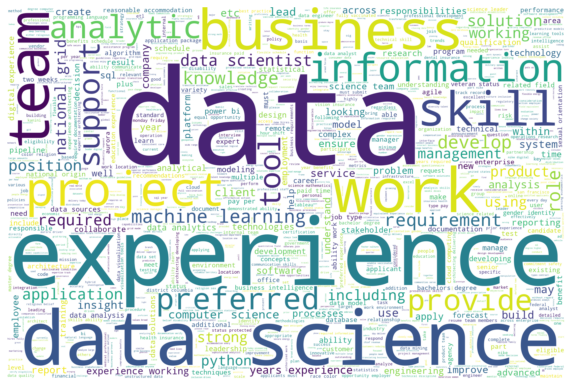

In [152]:
wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=1000, width=2250, height= 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## <i><font color='orange'>plot</font></i>

In [154]:
df = pd.read_csv(r".\data\data_clean_enrich.csv")

<AxesSubplot:xlabel='Count', ylabel='rate'>

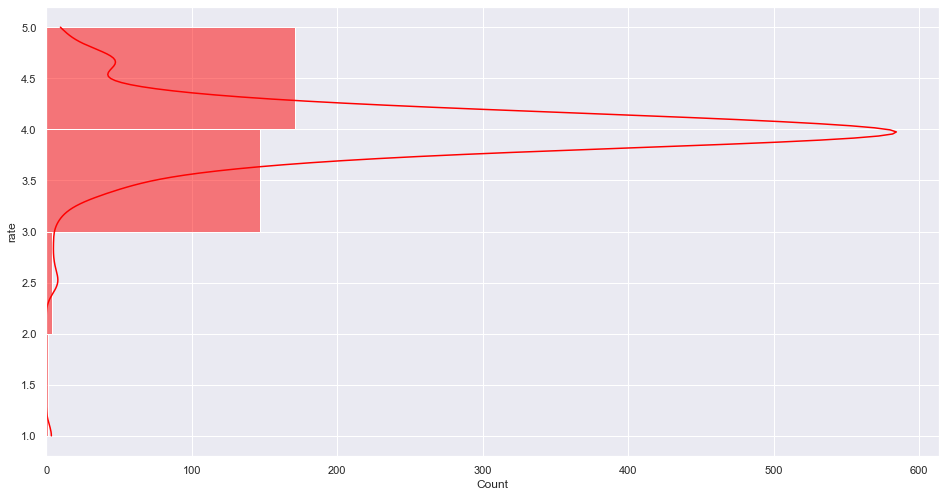

In [294]:
sns.histplot(y=df['rate'], kde=True, color='red', binwidth=1)


Text(0.5, 1.0, 'Titles')

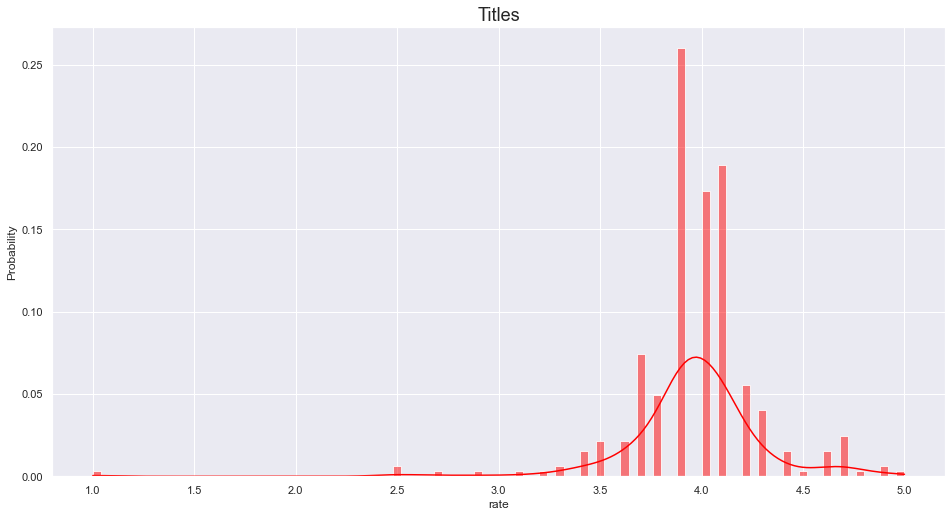

In [298]:
sns.histplot(x=df['rate'], kde=True, color='red', bins=100, stat='probability')
plt.title('Titles', fontsize=18)
# plt.xlabel('name of titles', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)

Text(0.5, 1.0, 'Titles')

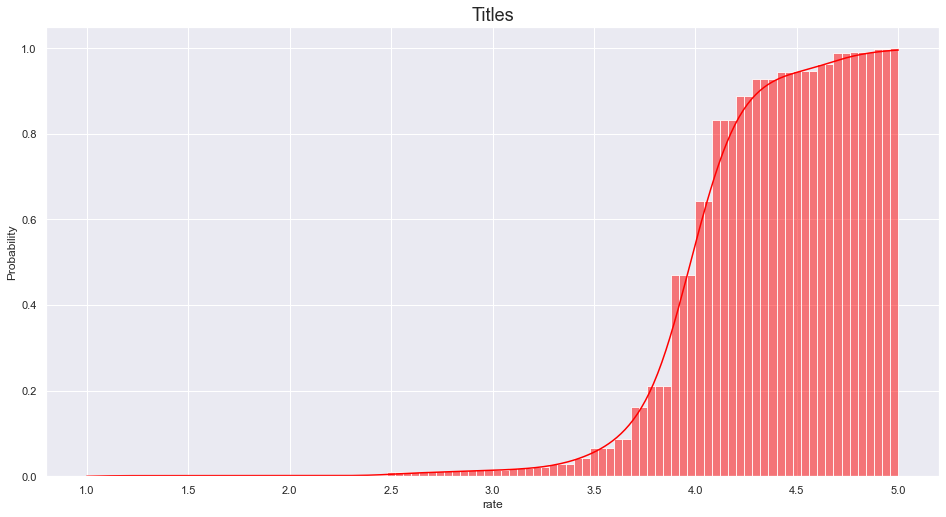

In [299]:
sns.histplot(x=df['rate'], kde=True, color='red', bins=100, stat='probability',cumulative=True)
plt.title('Titles', fontsize=18)
# plt.xlabel('name of titles', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)

Text(0.5, 1.0, 'Titles')

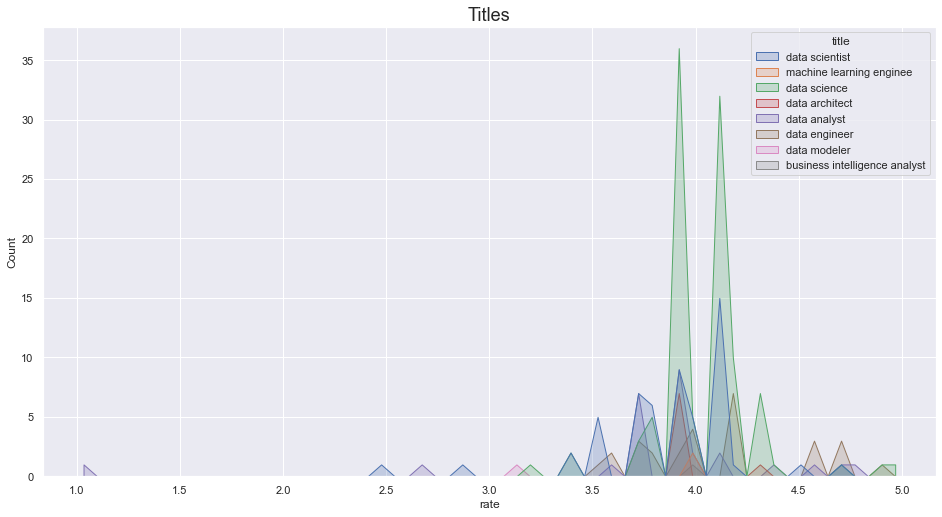

In [300]:
sns.histplot(x='rate',data=df, color='darkorange', hue='title',element='poly')
plt.title('Titles', fontsize=18)

<AxesSubplot:xlabel='rate', ylabel='Count'>

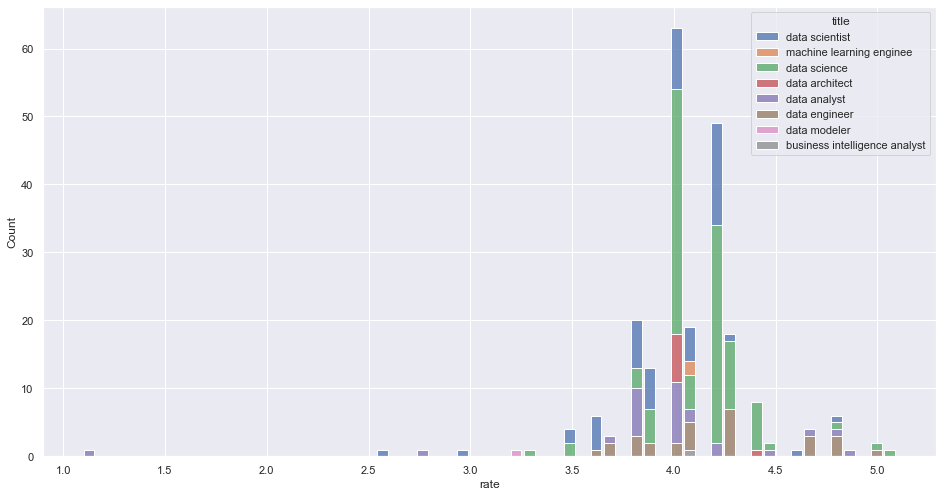

In [301]:
sns.histplot(x='rate',data=df, color='darkorange', hue='title',multiple='stack', shrink=0.8)

<AxesSubplot:xlabel='rate', ylabel='avg_salary'>

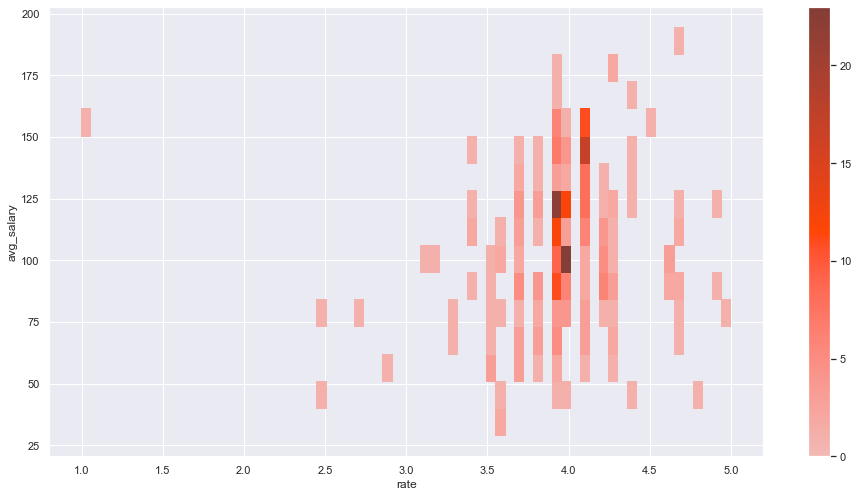

In [302]:
sns.histplot(x='rate',y='avg_salary',data=df, color='orangered',cbar=True)

<AxesSubplot:xlabel='avg_salary', ylabel='Count'>

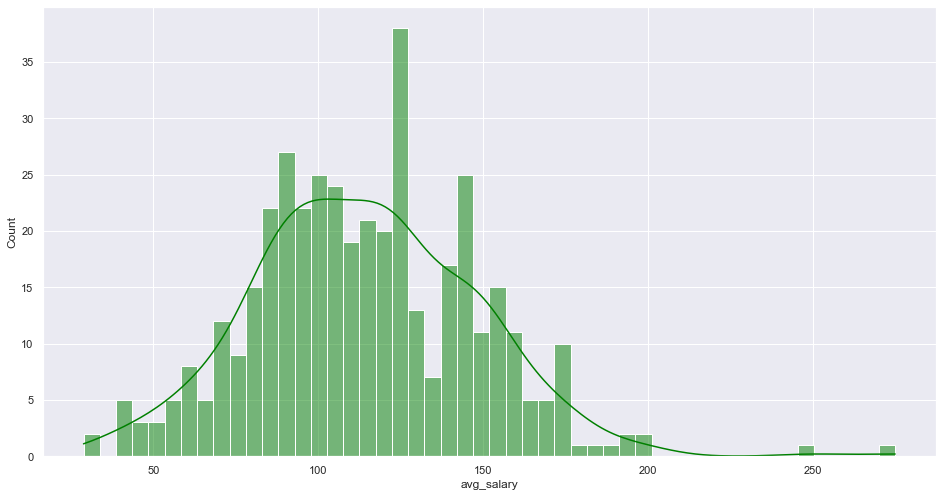

In [303]:
sns.histplot(x='avg_salary',data=df, bins=50,kde=True, color='green')

In [222]:
df.company_industry.value_counts()[:10]

Staffing & Outsourcing                      14
Motion Picture Production & Distribution     7
Utilities                                    6
IT Services                                  6
Enterprise Software & Network Solutions      6
Consumer Products Manufacturing              4
Consulting                                   4
Information Technology                       3
Biotech & Pharmaceuticals                    3
Business Services                            2
Name: company_industry, dtype: int64

<AxesSubplot:xlabel='company_size_number', ylabel='Probability'>

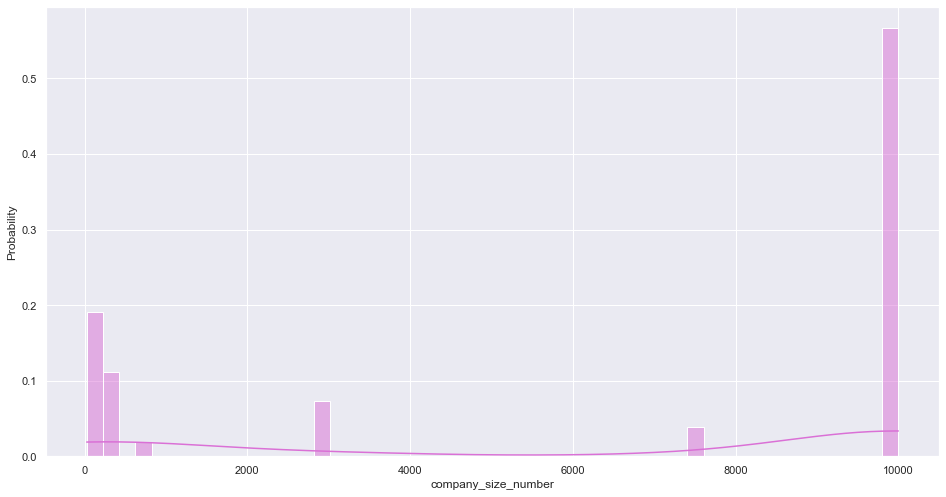

In [304]:
sns.histplot(x='company_size_number' , data=df, bins=50,stat='probability',kde=True,color='orchid')

In [259]:
df[['rate','avg_salary','company_size_number','skills']].corr()

,rate,avg_salary,company_size_number,skills
rate,1.000000,0.132725,-0.026456,-0.058625
avg_salary,0.132725,1.000000,-0.027191,-0.054191
company_size_number,-0.026456,-0.027191,1.000000,-0.040323
skills,-0.058625,-0.054191,-0.040323,1.000000


<AxesSubplot:>

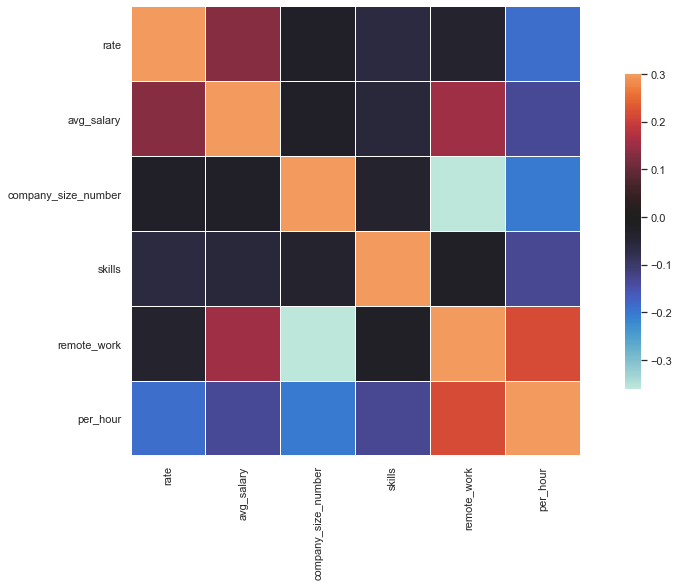

In [305]:
sns.heatmap(df[['rate','avg_salary','company_size_number','skills','remote_work','per_hour']].corr(),vmax=.3, center=0,square=True,linewidths=.5, cbar_kws={'shrink':.7})

In [275]:
df_cat = df[['state','title','position','company_size','company_type','company_sector','company_industry']]

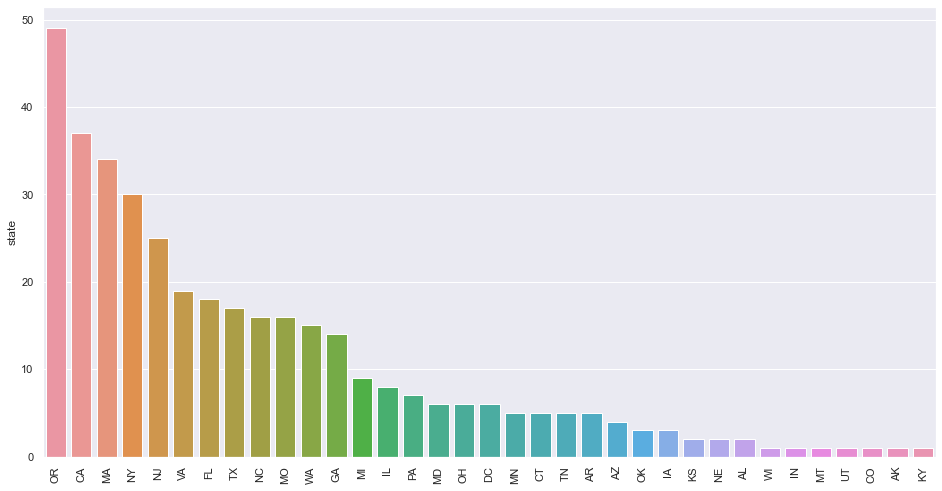

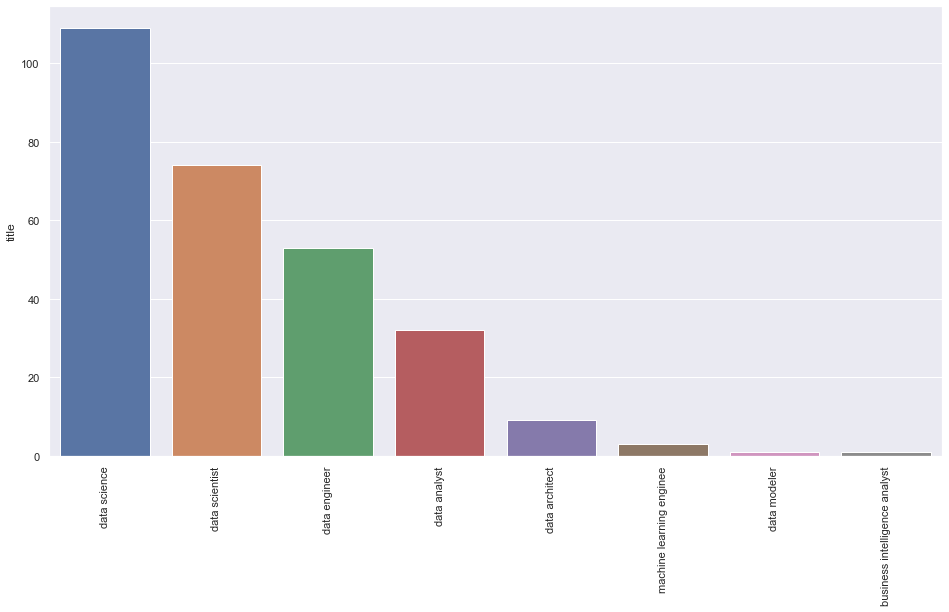

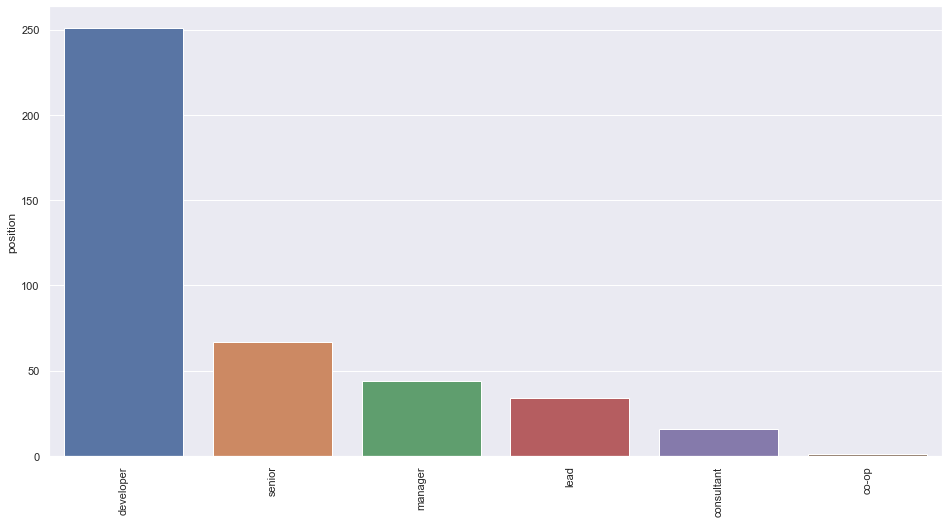

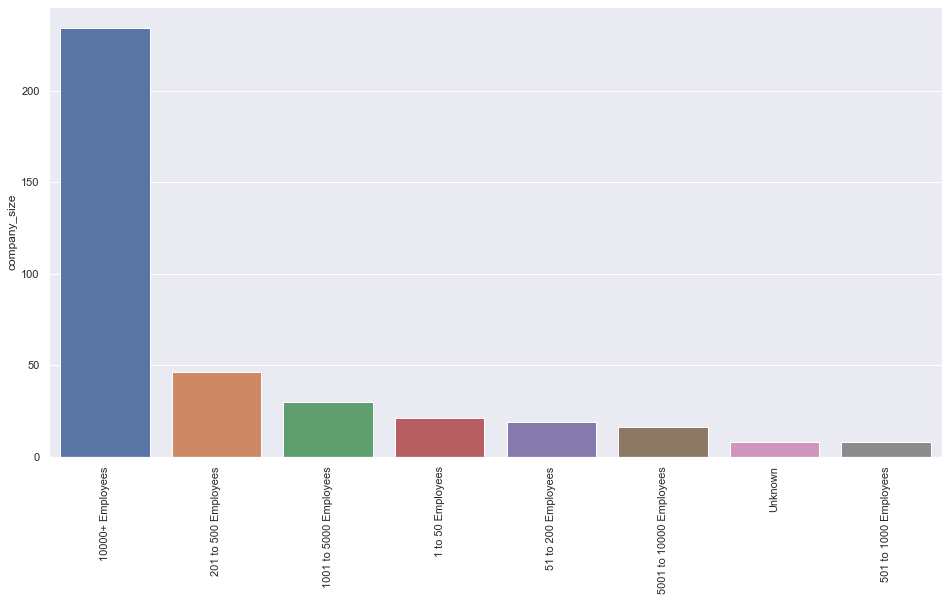

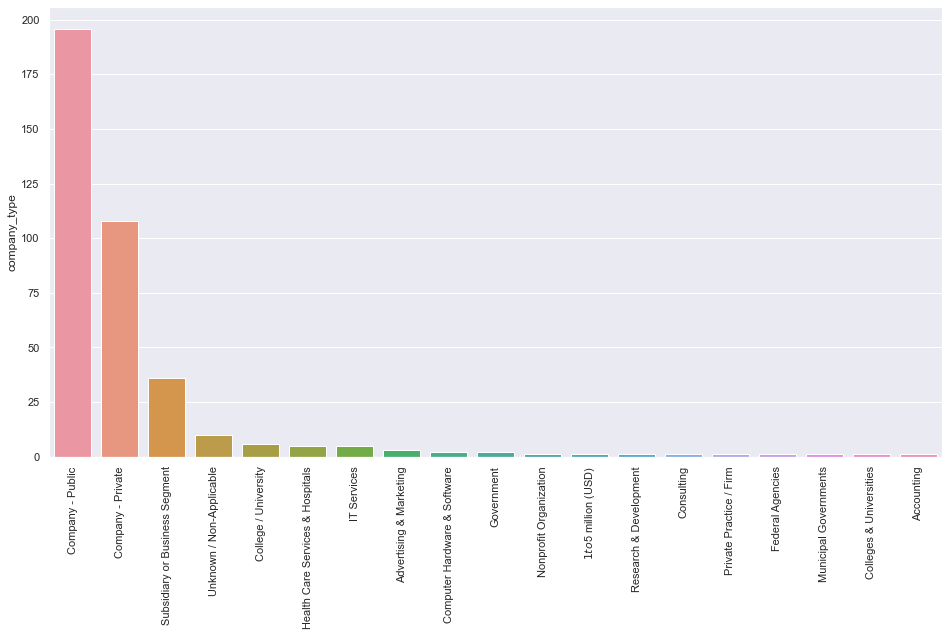

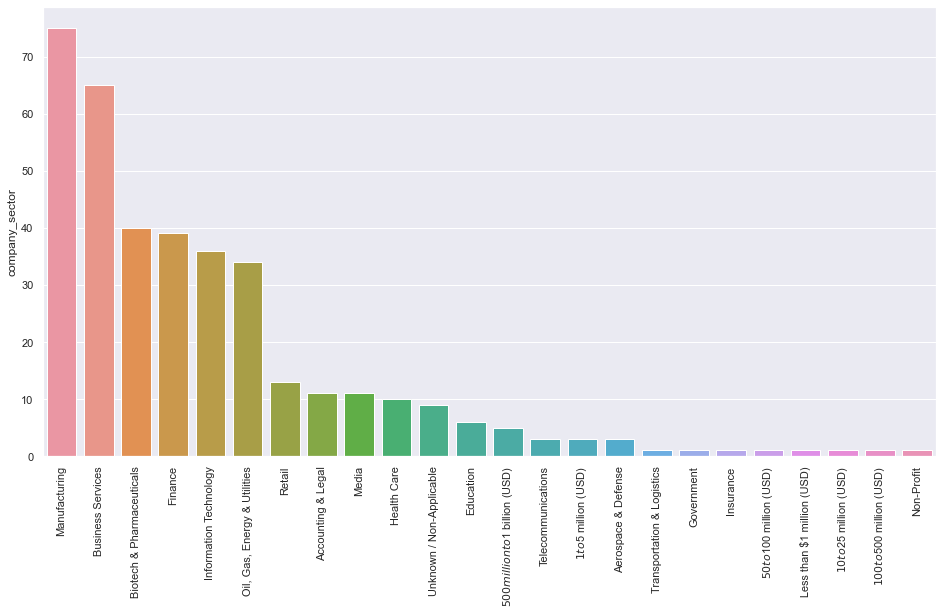

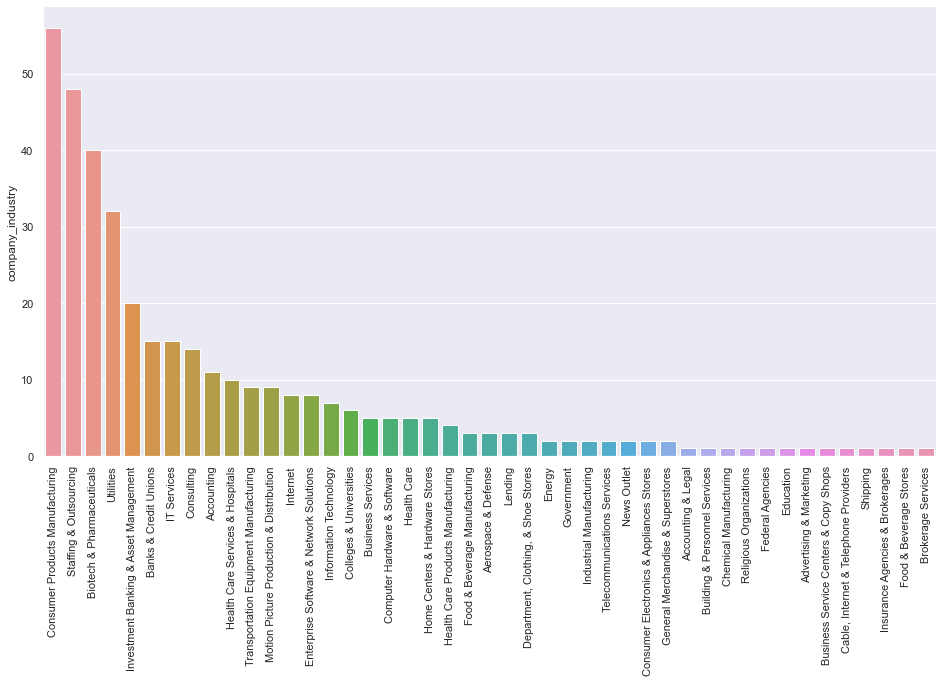

In [289]:

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()
